### Statistical test for SEFL mice



In [1]:
!pip install pingouin

     |████████████████████████████████| 183 kB 5.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
     |████████████████████████████████| 9.8 MB 27.2 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=70824c1b498a7d7dc13c636e12defc3460feb4880fa7a58ff8418697044d8526
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=8ac40ff2a0761737d06f45c6466297d647c743e1341223b14be1633f5abf4ab9
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

In [1]:
from os.path import join
import sys
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')
import pingouin as pg

import datetime
%matplotlib inline

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

from google.colab import drive
drive.mount('/content/drive')

save_dir = '/content/drive/Shareddrives/TuriLab/Data/PTSD_project/!analysis/saveFolder/'

Mounted at /content/drive


Loading data

In [26]:
df = pd.read_csv(join(save_dir,'noELS','DATA', 'filtered_nonELS_mice_4_27_22.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         584 non-null    int64  
 1   freezing           584 non-null    float64
 2   genotype           584 non-null    object 
 3   id                 584 non-null    object 
 4   day                584 non-null    object 
 5   condition          584 non-null    object 
 6   sex                584 non-null    object 
 7   cohort             584 non-null    object 
 8   exposure_mins      500 non-null    float64
 9   analyzed_duration  500 non-null    float64
 10  date               584 non-null    object 
 11  time               500 non-null    object 
 12  els                584 non-null    object 
 13  cohort_id          584 non-null    object 
 14  date_time          584 non-null    object 
 15  man_date_time      584 non-null    object 
 16  dob                584 non

 #### All mice seflb and recall sessions

Text(0.5, 1.0, 'Freezing stats (N=86)')

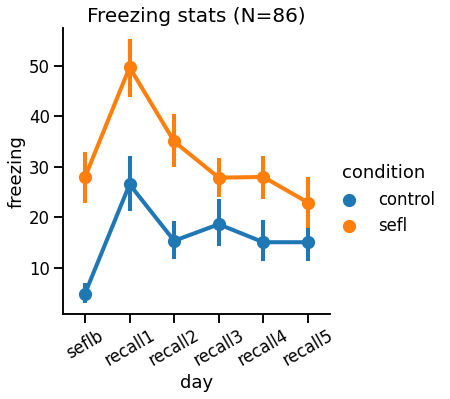

In [30]:
sessions = ['seflb', 'recall1', 'recall2', 'recall3', 'recall4', 'recall5']
anova_df = df[df['day'].isin(sessions)]
g = sns.catplot(data=anova_df, kind='point', x='day',
                y='freezing', hue='condition')
g.set_xticklabels(rotation=30)
plt.title(f'Freezing stats (N={anova_df.cohort_id.nunique()})',
          fontsize=20)

condition
control    34
sefl       52
Name: cohort_id, dtype: int64 

random mice: 34

condition
control    34
sefl       34
Name: cohort_id, dtype: int64 



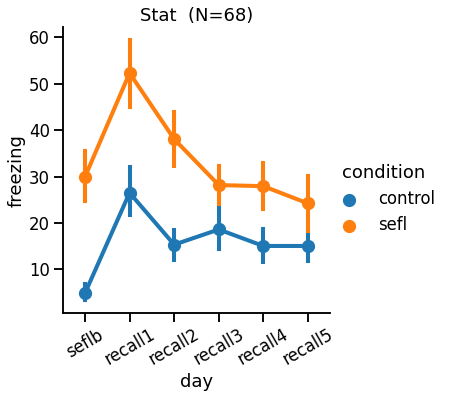

In [20]:
print(anova_df.groupby('condition')['cohort_id'].nunique(), '\n')

# picking equal amount of mice from sefl group
sefl_id = anova_df[anova_df['condition']=='sefl']['cohort_id'].unique()
rand_mice = np.random.choice(sefl_id, size=34, replace=False)
print(f'random mice: {len(rand_mice)}\n')

df_equal = pd.concat([anova_df[anova_df['condition']=='control'], 
                      anova_df[anova_df['cohort_id'].isin(rand_mice)]])
print(df_equal.groupby('condition')['cohort_id'].nunique(), '\n')

g = sns.catplot(data=df_equal, kind='point', x='day',
                y='freezing', hue='condition')
g.set_xticklabels(rotation=30)
plt.title(f'Stat  (N={df_equal.cohort_id.nunique()})')
# g.savefig(join(save_dir, 'noELS', 'Freezing_sefl_vs_ctl_stats.png'), 
#           dpi=300, transparent=True, box_inches='tight', 
#           figsize=(5,5))

In [24]:
#########
# mixed #
#########
df = df_equal
res = pg.mixed_anova(dv='freezing', between='condition', within='day',
                     subject='cohort_id',data=df)
res.round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,condition,24634.06652,1,53,24634.06652,34.90145,0.00000,NaN,0.39705,NaN,NaN,NaN,NaN
1,day,16172.03478,5,265,3234.40696,26.01137,0.00000,0.0,0.32921,0.61643,False,0.28169,0.0
2,Interaction,3484.33855,5,265,696.86771,5.60427,0.00006,NaN,0.09563,NaN,NaN,NaN,NaN


In [7]:
pg.pairwise_ttests(data=df, dv='freezing', between='condition',
                   within='day', subject='cohort_id').round(3)

,Contrast,day,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,day,-,recall1,recall2,True,True,6.954,51.000,two-sided,0.000,1.903e+06,0.725
1,day,-,recall1,recall3,True,True,6.427,51.000,two-sided,0.000,3.099e+05,0.941
2,day,-,recall1,recall4,True,True,6.882,51.000,two-sided,0.000,1.483e+06,0.971
3,day,-,recall1,recall5,True,True,6.395,51.000,two-sided,0.000,2.774e+05,1.057
4,day,-,recall1,seflb,True,True,9.252,51.000,two-sided,0.000,4.984e+09,0.953
5,day,-,recall2,recall3,True,True,1.696,51.000,two-sided,0.096,0.574,0.217
6,day,-,recall2,recall4,True,True,1.977,51.000,two-sided,0.053,0.912,0.270
7,day,-,recall2,recall5,True,True,2.185,51.000,two-sided,0.033,1.334,0.347
8,day,-,recall2,seflb,True,True,3.105,51.000,two-sided,0.003,10.269,0.317
9,day,-,recall3,recall4,True,True,0.557,51.000,two-sided,0.580,0.175,0.066


#### Sex differences

Males

random sefl mice: 23

condition
control    23
sefl       23
Name: cohort_id, dtype: int64 



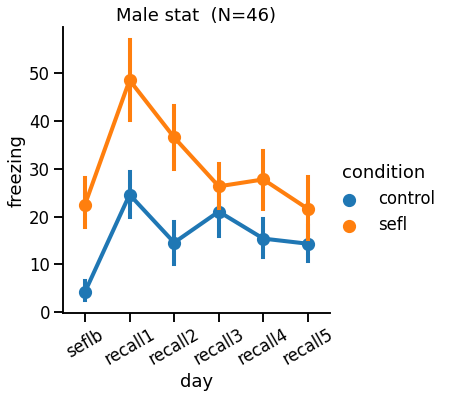

In [38]:
male_df = anova_df[anova_df['sex']=='male']
male_df.groupby('condition')['cohort_id'].nunique()

# picking equal amount of mice from sefl group
male_sefl_id = male_df[male_df['condition']=='sefl']['cohort_id'].unique()
rand_mice = np.random.choice(male_sefl_id, size=23, replace=False)
print(f'random sefl mice: {len(rand_mice)}\n')

df_equal = pd.concat([male_df[male_df['condition']=='control'], 
                      male_df[male_df['cohort_id'].isin(rand_mice)]])
print(df_equal.groupby('condition')['cohort_id'].nunique(), '\n')

g = sns.catplot(data=df_equal, kind='point', x='day',
                y='freezing', hue='condition')
g.set_xticklabels(rotation=30)
plt.title(f'Male stat  (N={df_equal.cohort_id.nunique()})')
g.savefig(join(save_dir, 'noELS', 'Male_freezing_sefl_vs_ctl_stats.png'), 
          dpi=300, transparent=True, box_inches='tight', 
          figsize=(5,5))

In [39]:
#########
# mixed #
#########
df = df_equal
res = pg.mixed_anova(dv='freezing', between='condition', within='day',
                     subject='cohort_id',data=df)
res.round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,condition,7743.91256,1,28,7743.91256,17.57173,0.00025,NaN,0.38558,NaN,NaN,NaN,NaN
1,day,8206.23709,5,140,1641.24742,15.01545,0.00000,0.0,0.34907,0.45806,False,0.08935,0.0
2,Interaction,2141.56592,5,140,428.31318,3.91855,0.00235,NaN,0.12277,NaN,NaN,NaN,NaN


In [37]:
pg.pairwise_ttests(data=df, dv='freezing', between='condition',
                   within='day', subject='cohort_id').round(3)

,Contrast,day,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,day,-,recall1,recall2,True,True,5.134,29.000,two-sided,0.000,1266.773,0.698
1,day,-,recall1,recall3,True,True,3.547,29.000,two-sided,0.001,25.482,0.762
2,day,-,recall1,recall4,True,True,4.037,29.000,two-sided,0.000,81.666,0.779
3,day,-,recall1,recall5,True,True,3.777,29.000,two-sided,0.001,43.76,0.919
4,day,-,recall1,seflb,True,True,8.480,29.000,two-sided,0.000,4.937e+06,0.985
5,day,-,recall2,recall3,True,True,0.294,29.000,two-sided,0.771,0.202,0.048
6,day,-,recall2,recall4,True,True,0.468,29.000,two-sided,0.643,0.215,0.093
7,day,-,recall2,recall5,True,True,0.865,29.000,two-sided,0.394,0.274,0.212
8,day,-,recall2,seflb,True,True,3.251,29.000,two-sided,0.003,12.973,0.383
9,day,-,recall3,recall4,True,True,0.276,29.000,two-sided,0.785,0.201,0.049


Females

condition
control    11
sefl       18
Name: cohort_id, dtype: int64 

random sefl mice: 11

condition
control    11
sefl       11
Name: cohort_id, dtype: int64 



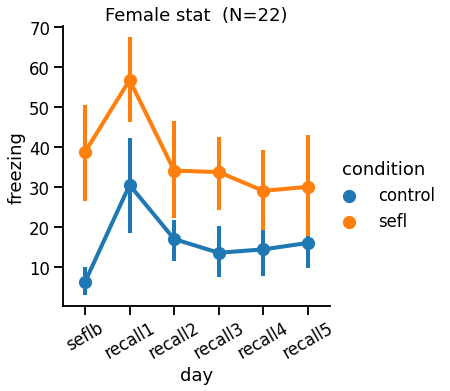

In [48]:
female_df = anova_df[anova_df['sex']=='female']
print(female_df.groupby('condition')['cohort_id'].nunique(), '\n')

# picking equal amount of mice from sefl group
female_sefl_id = female_df[female_df['condition']=='sefl']['cohort_id'].unique()
rand_mice = np.random.choice(female_sefl_id, size=11, replace=False)
print(f'random sefl mice: {len(rand_mice)}\n')

df_equal = pd.concat([female_df[female_df['condition']=='control'], 
                      female_df[female_df['cohort_id'].isin(rand_mice)]])
print(df_equal.groupby('condition')['cohort_id'].nunique(), '\n')

g = sns.catplot(data=df_equal, kind='point', x='day',
                y='freezing', hue='condition')
g.set_xticklabels(rotation=30)
plt.title(f'Female stat  (N={df_equal.cohort_id.nunique()})')
# g.savefig(join(save_dir, 'noELS', 'Female_freezing_sefl_vs_ctl_stats.png'), 
#           dpi=300, transparent=True, box_inches='tight', 
#           figsize=(5,5))

In [49]:
#########
# mixed #
#########
df = df_equal
res = pg.mixed_anova(dv='freezing', between='condition', within='day',
                     subject='cohort_id',data=df)
res.round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,condition,14296.67869,1,20,14296.67869,16.28396,0.00065,NaN,0.44879,NaN,NaN,NaN,NaN
1,day,7804.09143,5,100,1560.81829,11.84864,0.00000,0.00001,0.37203,0.59479,False,0.13439,0.0005
2,Interaction,1457.04829,5,100,291.40966,2.21218,0.05887,NaN,0.09959,NaN,NaN,NaN,NaN


Males vs Females
#### This is hard to interpret due to the differences in the number of mice

sex
female    18
male      34
Name: cohort_id, dtype: int64 

random sefl mice: 34

sex
female    18
male      34
Name: cohort_id, dtype: int64 



Text(0.5, 1.0, 'm_f_sefl stat  (N=52)')

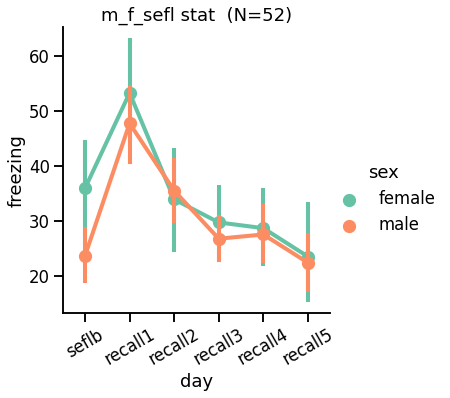

In [63]:
m_f_sefl_df = anova_df[anova_df['condition']=='sefl']
print(m_f_sefl_df.groupby('sex')['cohort_id'].nunique(), '\n')

# picking equal amount of mice from sefl group
m_sefl_id = m_f_sefl_df[m_f_sefl_df['sex']=='male']['cohort_id'].unique()
rand_mice = np.random.choice(m_sefl_id, size=34, replace=False)
print(f'random sefl mice: {len(rand_mice)}\n')

df_equal = pd.concat([m_f_sefl_df[m_f_sefl_df['sex']=='female'], 
                      m_f_sefl_df[m_f_sefl_df['cohort_id'].isin(rand_mice)]])
print(df_equal.groupby('sex')['cohort_id'].nunique(), '\n')

g = sns.catplot(data=df_equal, kind='point', x='day',
                y='freezing', hue='sex', palette='Set2')
g.set_xticklabels(rotation=30)
plt.title(f'm_f_sefl stat  (N={df_equal.cohort_id.nunique()})')
# g.savefig(join(save_dir, 'noELS', 'm_f_sefl_freezing_sefl_vs_ctl_stats.png'), 
#           dpi=300, transparent=True, box_inches='tight', 
#           figsize=(5,5))

In [64]:
#########
# mixed #
#########
df = df_equal
res = pg.mixed_anova(dv='freezing', between='sex', within='day',
                     subject='cohort_id',data=df)
res.round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,sex,2373.93151,1,42,2373.93151,2.84469,0.09909,NaN,0.06343,NaN,NaN,NaN,NaN
1,day,19410.57868,5,210,3882.11574,25.07980,0.00000,0.0,0.37388,0.66805,False,0.32302,0.00002
2,Interaction,849.03528,5,210,169.80706,1.09701,0.36311,NaN,0.02545,NaN,NaN,NaN,NaN


#### SERT Cre mice
These mice have been so far excluded. need to make the data table

In [66]:
sert_df = anova_df[anova_df['genotype']=='sert_het']
print(sert_df['cohort_id'].nunique(), '\n')

# picking equal amount of mice from sefl group
control_id = sert_df[sert_df['genotype']=='wt']['cohort_id'].unique()
rand_mice = np.random.choice(m_sefl_id, size=34, replace=False)
print(f'random sefl mice: {len(rand_mice)}\n')

# df_equal = pd.concat([sert_df[sert_df['sex']=='female'], 
#                       sert_df[sert_df['cohort_id'].isin(rand_mice)]])
# print(df_equal.groupby('sex')['cohort_id'].nunique(), '\n')

# g = sns.catplot(data=df_equal, kind='point', x='day',
#                 y='freezing', hue='sex', palette='Set2')
# g.set_xticklabels(rotation=30)
# plt.title(f'm_f_sefl stat  (N={df_equal.cohort_id.nunique()})')
# g.savefig(join(save_dir, 'noELS', 'm_f_sefl_freezing_sefl_vs_ctl_stats.png'), 
#           dpi=300, transparent=True, box_inches='tight', 
#           figsize=(5,5))

0 

random sefl mice: 34



In [68]:
anova_df['genotype'].unique()

array(['wt'], dtype=object)